In [1]:
import matplotlib.pyplot as plt
import pickle

In /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
file='logs2022-05-14_11:36:01'
with open('out/'+file+'.pkl','rb') as savefile:
    save = pickle.load(savefile)

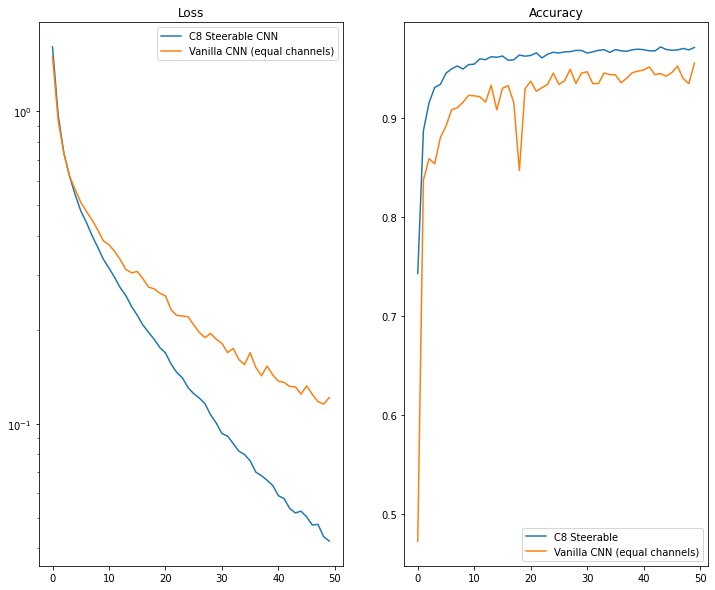

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,10))
ax1.plot(save['steerable']['train']['loss'], label='C8 Steerable CNN')
ax1.plot(save['unsteerable']['train']['loss'], label='Vanilla CNN (equal channels)')
ax1.legend()
ax1.set_title('Loss')
ax1.set_yscale('log')
ax2.plot(save['steerable']['validation']['accuracy'], label='C8 Steerable')
ax2.plot(save['unsteerable']['validation']['accuracy'], label='Vanilla CNN (equal channels)')
ax2.legend()
ax2.set_title('Accuracy')
plt.show()
#plt.savefig('out/'+file+'.png')

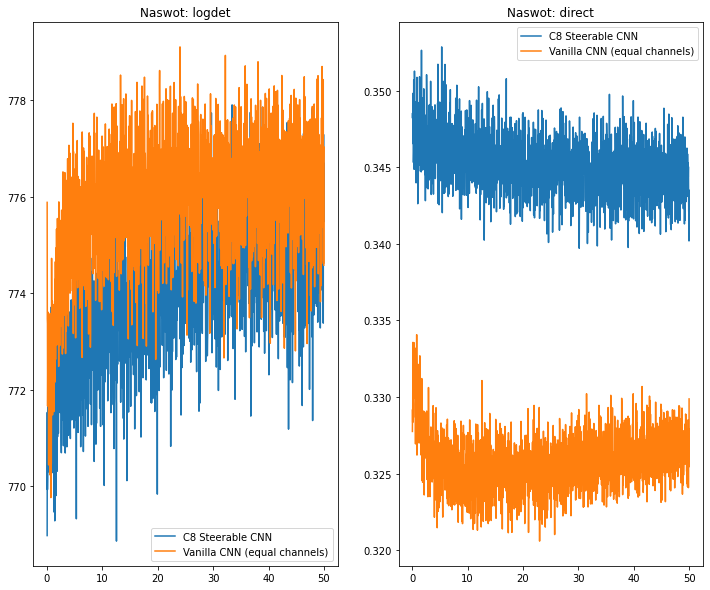

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,10))
flatbatch = [item for sublist in save['steerable']['train']['batch'] for item in sublist]
if not max(flatbatch) > 1.0:
    epoch = 0
    for (i, batch) in enumerate(flatbatch):
        flatbatch[i] += epoch
        if batch == 1.0:
            epoch += 1
indices = [i+1 for i in range(len(flatbatch)-1) if flatbatch[i+1]-flatbatch[i] > 0.02]
ax1.plot([flatbatch[i] for i in indices], [save['steerable']['train']["naswot_ld"][i] for i in indices], label='C8 Steerable CNN')
ax1.plot([flatbatch[i] for i in indices], [save['unsteerable']['train']["naswot_ld"][i] for i in indices], label='Vanilla CNN (equal channels)')
ax1.legend()
ax1.set_title('NASWOT: logdet')
ax2.plot(flatbatch, save['steerable']['train']["naswot_rs"], label='C8 Steerable CNN')
ax2.plot(flatbatch, save['unsteerable']['train']["naswot_rs"], label='Vanilla CNN (equal channels)')
ax2.legend()
ax2.set_title('NASWOT: direct')
plt.show()
#plt.savefig('out/'+file+'testbatch.png')